# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
# Save to df
data = pd.read_csv('spaceship-titanic/train.csv')
label = data['Transported']

# Shape
print('Data shape:', data.shape)

Data shape: (8693, 14)


Now let's understand the data

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# delate rows with NaN, also delate from label
data = data.dropna()
label = data['Transported']

# print size
print('Data shape:', data.shape)



Data shape: (6606, 14)


In [5]:
data.isna().sum(axis=0)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [6]:
data.isna().any()

PassengerId     False
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name            False
Transported     False
dtype: bool

Delate Name

In [7]:
# remove Transported
data = data.drop(['Transported'], axis=1)

#remove Name
data = data.drop(['Name'], axis=1)

Let's focus on the properties of the numerical features

In [8]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [9]:
print(len(data))

6606


Here we create 2 lists with the name of categorical features and numerical features

In [10]:
data.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [11]:
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Group', 'Member']

In [12]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [13]:
cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Group', 'Member']

## Numerical Features

In [14]:
data[num_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


Age - The age of the passenger.

<Axes: xlabel='Age', ylabel='Count'>

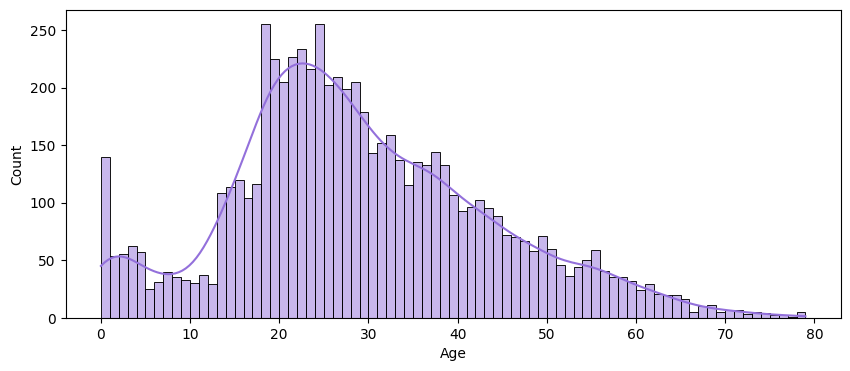

In [15]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Age', binwidth=1, kde=True, color='mediumpurple')

RoomService: The amount of money that tha passenger spent for RoomService  

<Axes: xlabel='RoomService', ylabel='Count'>

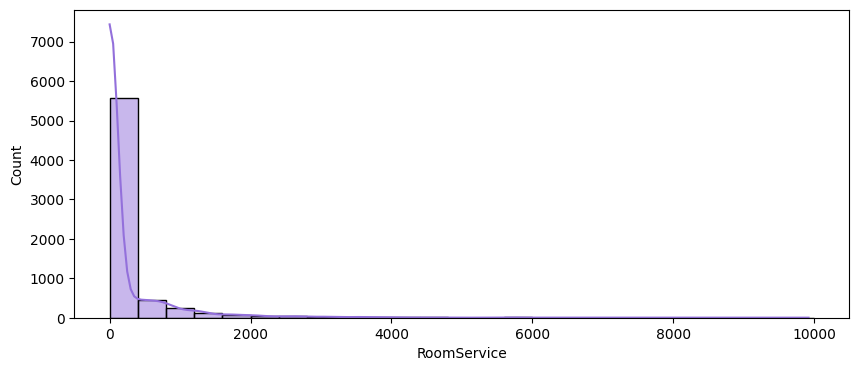

In [16]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='RoomService', binwidth=400, kde=True, color='mediumpurple')

FoodCourt: The amount of money that tha passenger spent for FoodCourt  

<Axes: xlabel='FoodCourt', ylabel='Count'>

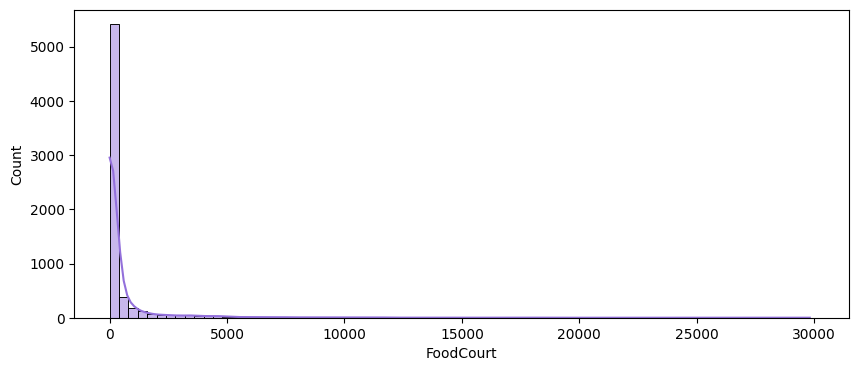

In [17]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='FoodCourt', binwidth=400, kde=True, color='mediumpurple')

ShoppingMall: The amount of money that tha passenger spent for ShoppingMall  

<Axes: xlabel='ShoppingMall', ylabel='Count'>

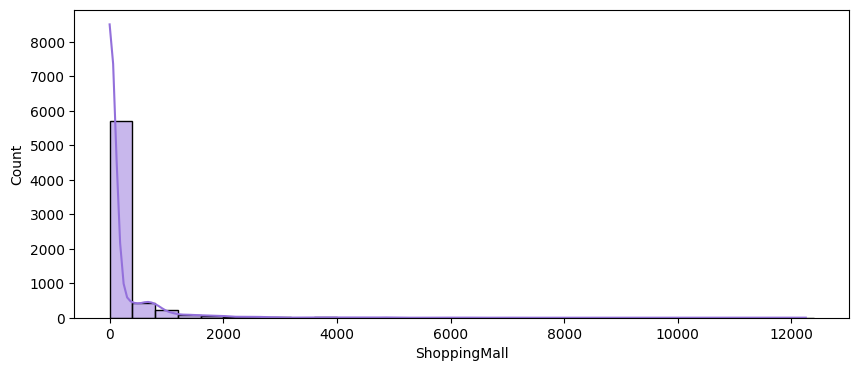

In [18]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='ShoppingMall', binwidth=400, kde=True, color='mediumpurple')

Spa: The amount of money that tha passenger spent for Spa  

<Axes: xlabel='Spa', ylabel='Count'>

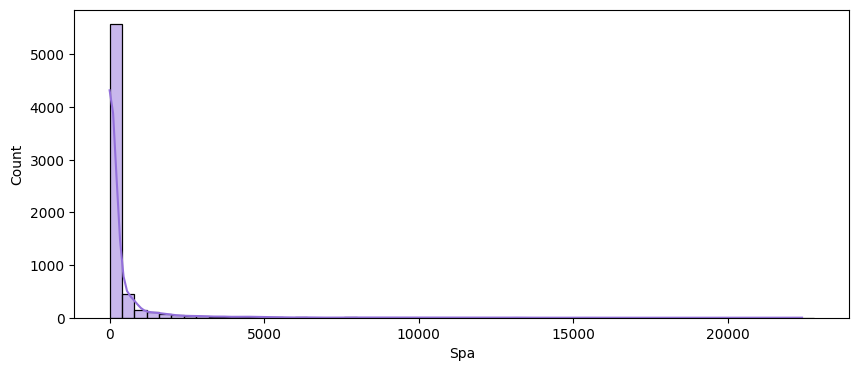

In [19]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Spa', binwidth=400, kde=True, color='mediumpurple')

VRDeck: The amount of money that tha passenger spent for VRDeck  

<Axes: xlabel='VRDeck', ylabel='Count'>

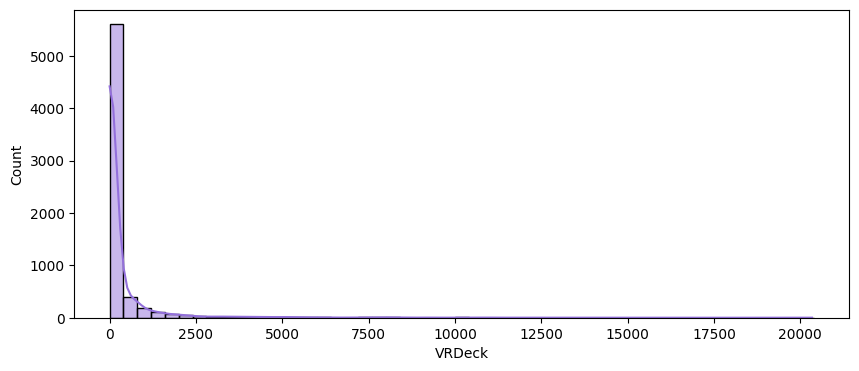

In [20]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='VRDeck', binwidth=400, kde=True, color='mediumpurple')

As we can clearly see, those features have the same distribution. 
From those plots we cannot say that the same group of people has spent the money in all the categories, but for the porpouse of this analysis we just care about the fact that those people have spent money.

to verify that we try to clusterize those features and see if there are results

In [21]:
services_features =['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [22]:
services = data[services_features]
services.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


<Figure size 500x500 with 0 Axes>

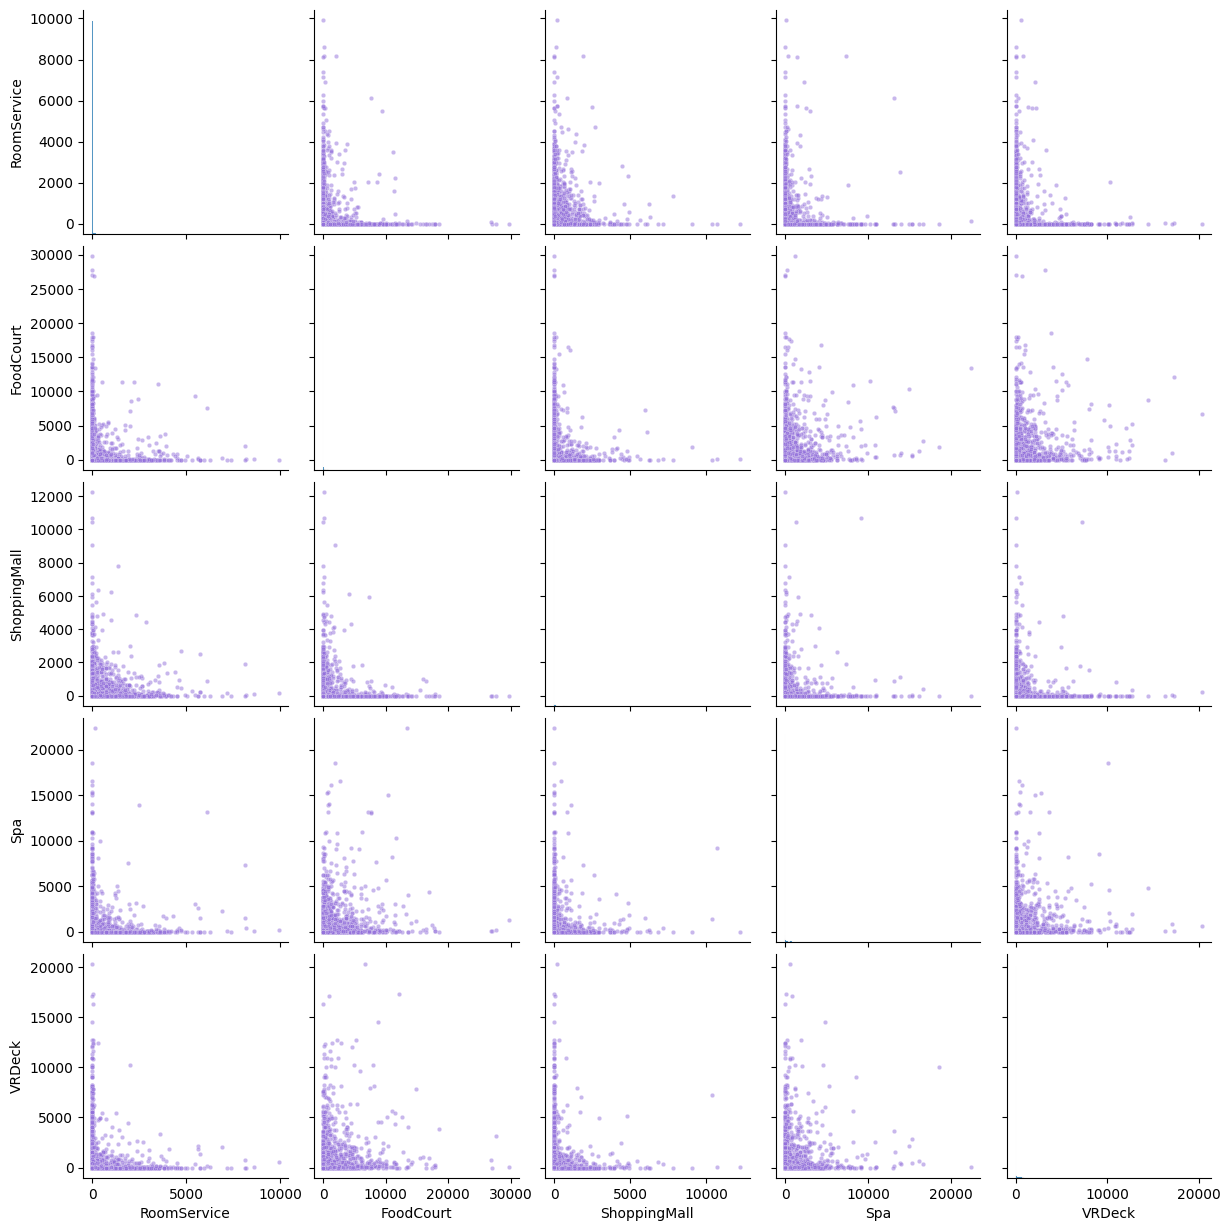

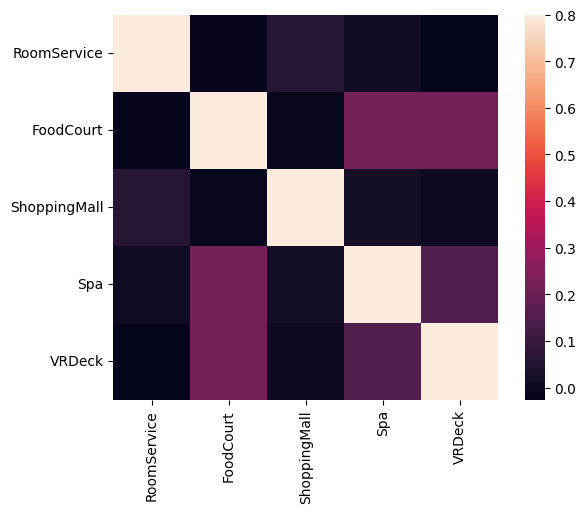

In [23]:
# # look the correlation of the features using subplots using seaborn
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(5,5))
sns.pairplot(services, vars= features, diag_kind="hist", plot_kws={'alpha':0.5, 's':10, 'color': 'mediumpurple'})
plt.show()


#plot correlation matrix
corrmat = services.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);




## Categorical Features

* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

<Axes: xlabel='HomePlanet', ylabel='count'>

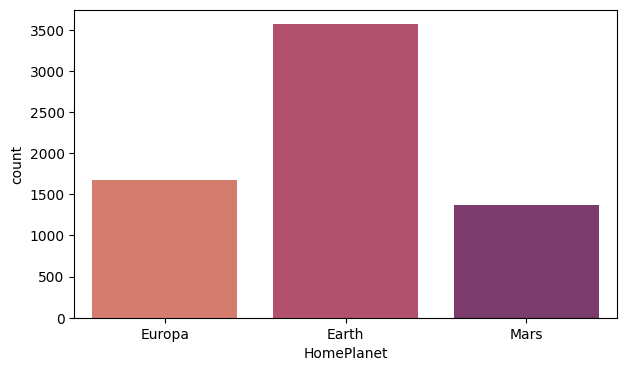

In [24]:
fig=plt.figure(figsize=(7,4))
palette = {0: "#9900b4", 1: "#0054b4", 2: "#b4004c"}

sns.countplot(data=data, x='HomePlanet', palette='flare')


 * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<Axes: xlabel='CryoSleep', ylabel='count'>

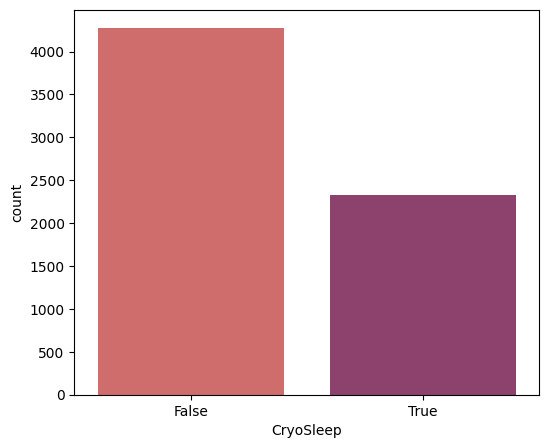

In [25]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='CryoSleep', palette='flare')


* **Destination** - The planet the passenger will be debarking to.

<Axes: xlabel='Destination', ylabel='count'>

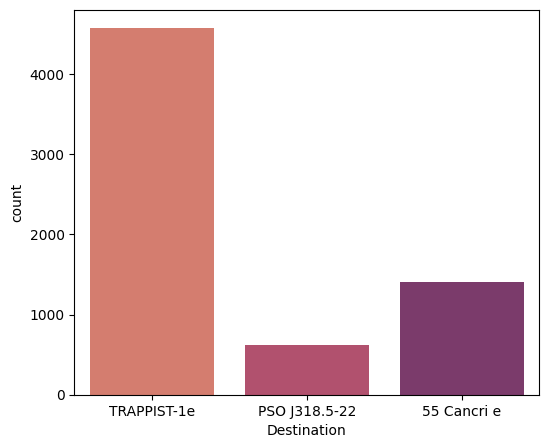

In [26]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='Destination', palette='flare')


 * **VIP** - Whether the passenger has paid for special VIP service during the voyage.

<Axes: xlabel='VIP', ylabel='count'>

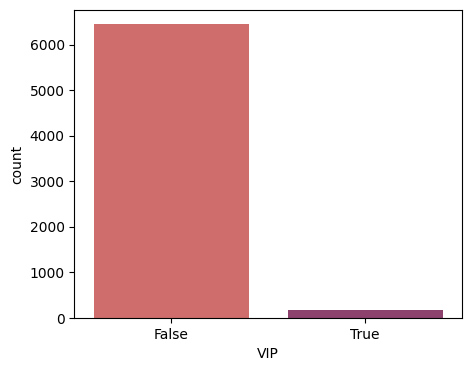

In [27]:
fig=plt.figure(figsize=(5,4))

sns.countplot(data=data, x='VIP', palette='flare')


In [28]:
cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Group', 'Member']

PassengerID

* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [29]:
data['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 6606, dtype: object

[1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 3, 1, 1, 3, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 

Text(0.5, 1.0, 'Group distribution')

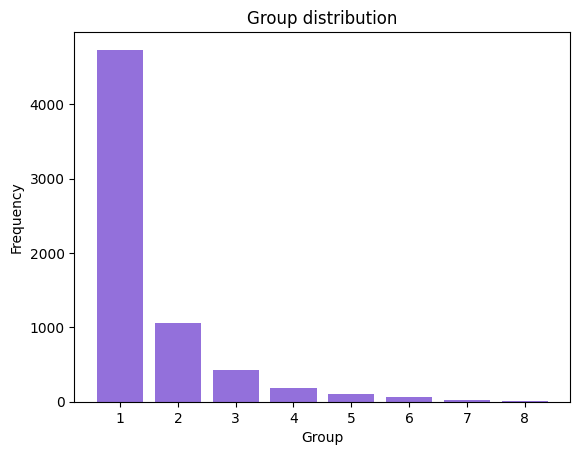

In [30]:
gruop, member = [],[]
for pID in data['PassengerId']:
    gruop.append(int(pID[0:4]))
    member.append(int(pID[5:7]))

fres, bins = np.histogram(member, np.linspace(0.5,8.5,9))
bins = [1,2,3,4,5,6,7,8]
print(member)
plt.bar(bins,fres,  color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Group distribution')

In [31]:
np.linspace(0.5,7.5,8)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [32]:
unique, counts = np.unique(gruop, return_counts=True)
unique

array([   1,    2,    3, ..., 9278, 9279, 9280])

<Figure size 1000x400 with 0 Axes>

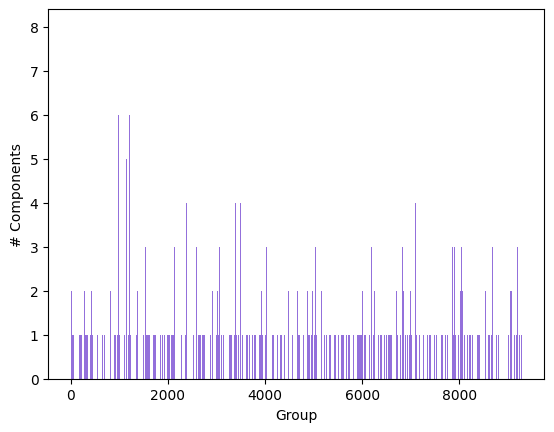

<Figure size 1000x400 with 0 Axes>

In [33]:
unique, counts = np.unique(gruop, return_counts=True)
plt.bar(unique,counts, color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('# Components')

plt.figure(figsize = (10,4))


In [34]:
#now split the feature IdPassenger in two features, group and member
data['Group'] = gruop
data['Member'] = member
len(data)

# print(data['Member'].unique())


6606

In [35]:
if 'PassengerId' in data.keys():
    data = data.drop(['PassengerId'], axis=1)

Cabin

* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [36]:
data['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 6606, dtype: object

In [37]:
trys = 'E/608/S'
trys = trys.split('/')
trys

['E', '608', 'S']

In [38]:
cabin_dict = {
    'Deck': [],
    'Num': [],
    'Side': []
}
for c in data["Cabin"]:
    #split c by /
    if type(c) == float:
        cabin_dict['Deck'].append(np.nan)
        cabin_dict['Num'].append(np.nan)
        cabin_dict['Side'].append(np.nan)
        continue
    c = c.split('/')
    for i,let in enumerate('ABCDEFGT'):
        if c[0] == let:
            cabin_dict['Deck'].append(let)

    # cabin_dict['Deck'].append(c[0])
    cabin_dict['Num'].append(int(c[1]))

    for i,let in enumerate('SP'):
        if c[2] == let:
            cabin_dict['Side'].append(let)

# cabin_dict into dataframe
cabin_df = pd.DataFrame(cabin_dict)
cabin_df

,Deck,Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
6601,A,98,P
6602,G,1499,S
6603,G,1500,S
6604,E,608,S


In [39]:
len(cabin_df)

6606

In [40]:
#check if nan values are in the dataframe
cabin_df.isnull().sum()

Deck    0
Num     0
Side    0
dtype: int64

In [41]:
color = [] 
for sid in cabin_dict['Side']:
    if sid == 'S':
        color.append('red')
    if sid == 'P':
        color.append('blue')

In [42]:
len(color)

6606

creo un dict temporaneo con valori numerici per fare il plot

In [43]:
num_cabin_df = {}

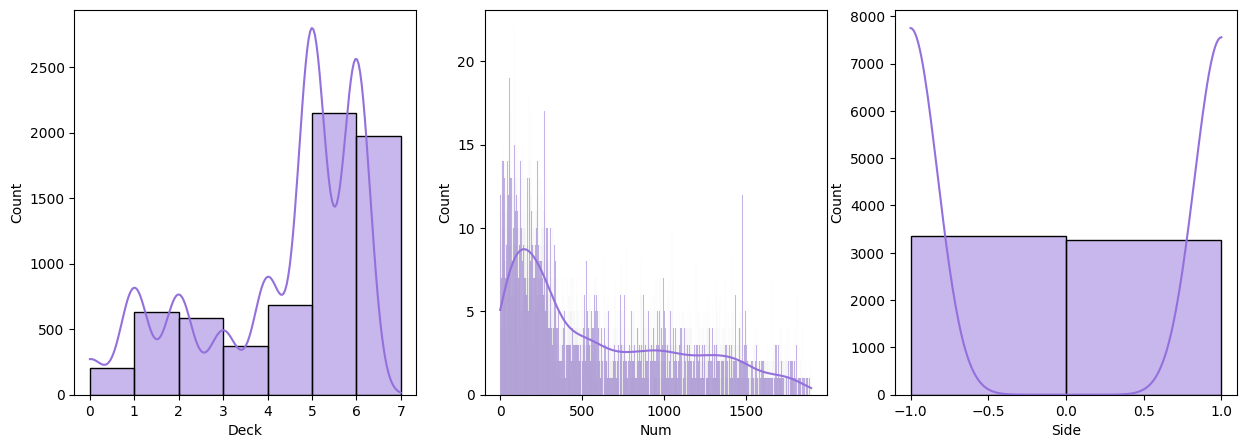

In [44]:
# Mappa le colonne non numeriche in valori numerici
num_cabin_df['Deck'] = cabin_df['Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G':6, 'T':7})
num_cabin_df['Side'] = cabin_df['Side'].map({'S': -1, 'P': 1})
num_cabin_df['Num'] = cabin_df['Num']

# plot the distribution of the features using subplot(1,3)
fig, ax = plt.subplots(1,3, figsize=(15,5))

#plot frequency of the features Deck, Num and Side
sns.histplot(data=num_cabin_df, x='Deck', binwidth=1, kde=True, color='mediumpurple', ax=ax[0])
sns.histplot(data=num_cabin_df, x='Num', binwidth=1, kde=True, color='mediumpurple', ax=ax[1])
sns.histplot(data=num_cabin_df, x='Side', binwidth=1, kde=True, color='mediumpurple', ax=ax[2])
plt.show()




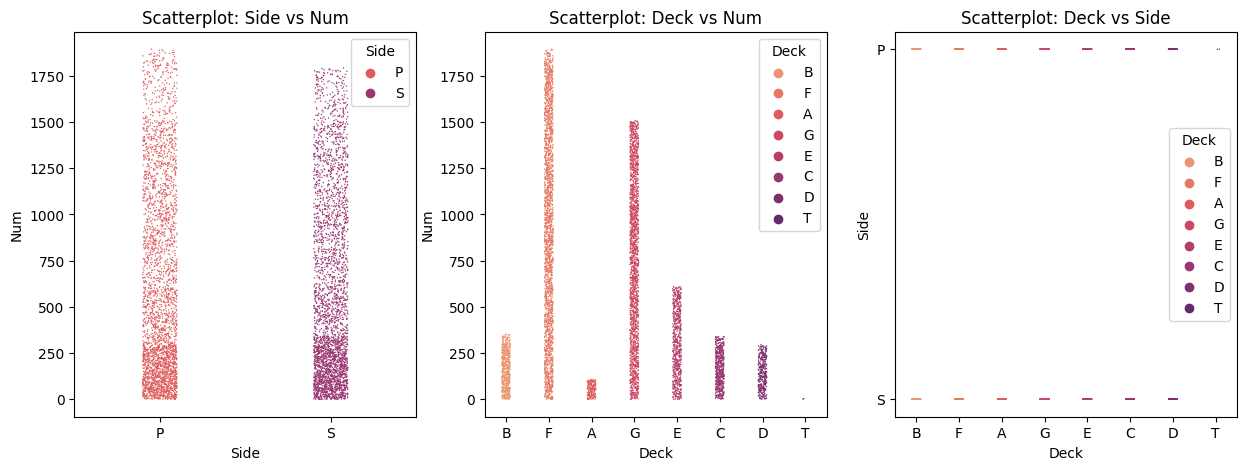

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.stripplot(data=cabin_df, x="Side", y="Num", ax=axes[0], s=1, hue='Side', palette='flare')
axes[0].set_title("Scatterplot: Side vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Num", ax=axes[1], s=1, hue='Deck', palette='flare')
axes[1].set_title("Scatterplot: Deck vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Side", ax=axes[2], s=1, hue='Deck', palette='flare')
axes[2].set_title("Scatterplot: Deck vs Side")

plt.show()

Merge the 2 dictionaries

In [46]:
# drop Cabin
if 'Cabin' in data.keys():
    data = data.drop(['Cabin'], axis=1)

In [47]:
len(data)

6606

In [48]:
print(len(data['Age']), len(label), len(cabin_df))

6606 6606 6606


In [49]:
print(len(data['Age']), len(label), len(cabin_df))
#6606 6606 6606

# merge the two dataframe
data = pd.concat([data.reset_index(drop=True), cabin_df.reset_index(drop=True)], axis=1)
data.head()

print(len(data['Age']), len(label), len(cabin_df))
#8213 6606 6606

6606 6606 6606
6606 6606 6606


In [50]:
print(len(data['Age']), len(label), len(cabin_df))

6606 6606 6606


## New analysis for new features

In [51]:
for f in data.keys():
    print(f,type(data[f][0]))
    if type(data[f][0]) == float:
        print(f)

HomePlanet <class 'str'>
CryoSleep <class 'bool'>
Destination <class 'str'>
Age <class 'numpy.float64'>
VIP <class 'bool'>
RoomService <class 'numpy.float64'>
FoodCourt <class 'numpy.float64'>
ShoppingMall <class 'numpy.float64'>
Spa <class 'numpy.float64'>
VRDeck <class 'numpy.float64'>
Group <class 'numpy.int64'>
Member <class 'numpy.int64'>
Deck <class 'str'>
Num <class 'numpy.int64'>
Side <class 'str'>


/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_64048/840795353.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data[num_features].corr()


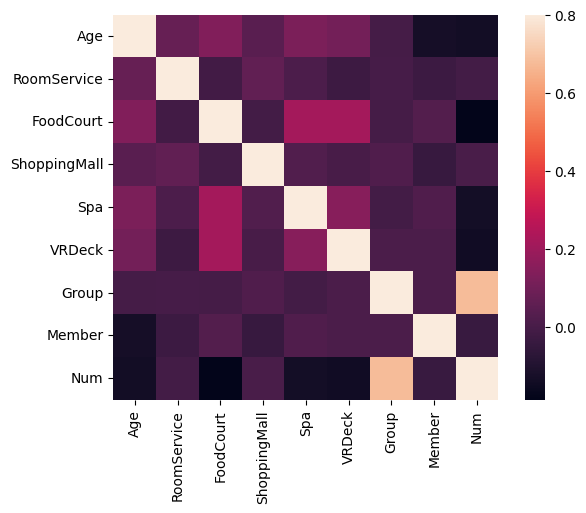

In [52]:
# correlation matrix with the new features
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Num', 'Side']
corrmat = data[num_features].corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

In [53]:
size_plt = []
for s in data['Side']:
    if s == 'S':
        size_plt.append(1)
    if s == 'P':
        size_plt.append(10)
    if type(s) == float:
        size_plt.append(0)

size_plt

[10,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 10,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 10,
 10,
 1,
 10,
 10,
 1,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 10,
 10,
 1,
 10,
 1,
 1,
 10,
 1,
 1,
 10,
 10,
 1,
 1,
 10,
 1,
 1,
 1,
 10,
 10,
 1,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 10,
 10,
 1,
 1,
 10,
 1,
 10,
 10,
 1,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 10,
 1,
 10,
 10,
 1,
 1,
 1,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 10,
 1,
 1,
 10,
 10,
 1,
 1,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 1,
 1,
 10,
 1,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 10,
 10,
 1,
 10,
 10,
 10,
 1,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 10,
 10,
 1,
 1,
 10,
 10,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 10,
 10,
 1,
 10,
 1,
 1,
 1,
 10,
 10,
 10,
 10,
 1,
 10,
 1,
 1

In [54]:
#Plot the distibution of Group and Num since they are the most correlated features using color to distinguish the Deck, using scatterplot, using plotly
import plotly.express as px
fig = px.scatter(data, x="Group", y="Num", color="Deck", trendline="ols", template="simple_white", size=size_plt)
fig.show()


In [55]:
# add data['Alone'] feature of all 0
data['Alone'] = np.zeros(len(data['Group']))

In [56]:
# create feature "Alone" to check if the passenger is alone or not
id = 0
numb_alone = 0
for g in data['Group']:
    id += 1
    # print(g)
    count = 0
    for m in data['Member'][data['Group'] == g]:
        count += 1
    if count == 1:
        # print("Alone", id)
        numb_alone += 1
        data['Alone'][id] = 1
    else:
        data["Alone"][id] = 0

data["Alone"].sum()

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_64048/1328679265.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_64048/1328679265.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4021.0

In [57]:
len(data)

6606

In [58]:
data['Deck'][data['Alone'] == 1].isna().sum()

0

In [59]:
# #Plot the distibution of Group and Num since they are the most correlated features using color to distinguish the Deck, using scatterplot, using plotly
# import plotly.express as px
# filtered_data = data[data['Alone'] == 0]
# fig = px.scatter(data[data['Alone'] == 0], x="Group", y="Num", trendline="ols",  color_discrete_map={'points': 'blue'})
# # fig = px.scatter(data[data['Alone'] == 1], x="Group", y="Num", trendline="ols",  color='blue')

# fig.show()


In [60]:
# x = data['Group'][data['Deck'] == 'G']
# y = data['Num'][data['Deck'] == 'G']

# plt.scatter(x,y, color='mediumpurple', s=1)

# #fit the line
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b, color='red')
# plt.xlim(0, 800)
# plt.ylim(0, 100)
# plt.xlabel('Group')
# plt.ylabel('Num')
# plt.show()

In [61]:
# # search for a nan in the y and fill it with the value of the line
# for i in range(len(y)):
#     if np.isnan(y[i]):
#         y[i] = m*x[i] + b
#         print(y[i])

# Preprocessing

In [62]:
data.isna().any()

HomePlanet      False
CryoSleep       False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Group           False
Member          False
Deck            False
Num             False
Side            False
Alone           False
dtype: bool

In [63]:
data.head()
print(data['Deck'].shape)

(6606,)


# Missing Values

In [64]:
data.isna().any()

HomePlanet      False
CryoSleep       False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Group           False
Member          False
Deck            False
Num             False
Side            False
Alone           False
dtype: bool

In [65]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing


WE cannot seimply delete the missing values because we will lose a lot of data.

In [66]:
data[na_cols].isna()

""
0
1
2
3
4
...
6601
6602
6603
6604


In [67]:
# # Heatmap of missing values
# plt.figure(figsize=(12,6))
# sns.heatmap(data[na_cols].isna().T)

A passenger has 13 features. Since we saw that the maximum number of missing feature for a single passanger is 3 the percentage of missing feature is relatively low. So we choose not to eliminate entrances but instead fill the missing values. 


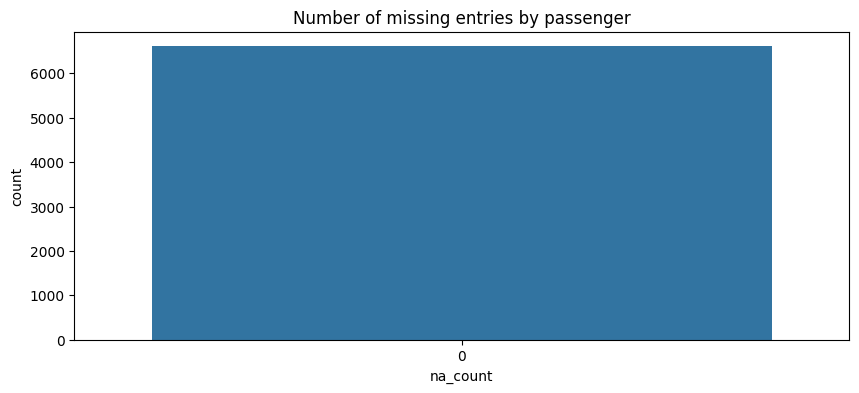

In [68]:
# Countplot of number of missing values by passenger
data['na_count']=data.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='na_count')
plt.title('Number of missing entries by passenger')
data.drop('na_count', axis=1, inplace=True)

We will use here the median for the numerical feature and then the mode for categorical ones.

In [69]:
data.isna().sum(axis=0)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Member          0
Deck            0
Num             0
Side            0
Alone           0
dtype: int64

Numerical Data

In [70]:
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Num']
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Alone','Side']


In [71]:
data[num_features].median()

Age               27.0
RoomService        0.0
FoodCourt          0.0
ShoppingMall       0.0
Spa                0.0
VRDeck             0.0
Group           4647.5
Member             1.0
Num              424.0
dtype: float64

In [72]:
data.isna().sum(axis=0)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Member          0
Deck            0
Num             0
Side            0
Alone           0
dtype: int64

Numerical Data

Drop the features that we don't need

In [73]:
# # Drop qualitative/redundant/collinear/high cardinality features
# data.drop(['PassengerId', 'Cabin', 'Name', ''], axis=1, inplace=True)
# data

# Normalization

**Min-Max Normalization**

In [74]:
# normaize features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Member,Deck,Num,Side,Alone
0,Europa,False,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,B,0.000000,P,0.0
1,Earth,False,TRAPPIST-1e,0.303797,False,0.010988,0.000302,0.002040,0.024500,0.002164,0.000108,0.000000,F,0.000000,S,1.0
2,Europa,False,TRAPPIST-1e,0.734177,True,0.004335,0.119948,0.000000,0.299670,0.002410,0.000216,0.000000,A,0.000000,S,1.0
3,Europa,False,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.030278,0.148563,0.009491,0.000216,0.142857,A,0.000000,S,0.0
4,Earth,False,TRAPPIST-1e,0.202532,False,0.030544,0.002348,0.012324,0.025214,0.000098,0.000323,0.000000,F,0.000528,S,0.0


In [75]:
print(len(data))

6606


In [76]:
num_features

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Group',
 'Member',
 'Num']

In [77]:
# PCA over the numerical features with 3 components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(data[num_features])
total_var = pca.explained_variance_ratio_.sum() * 100

In [78]:
data[num_features].shape

(6606, 9)

In [79]:
label.shape

(6606,)

In [80]:
import plotly.express as px
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color = label, size=0.1*np.ones(len(data[num_features])),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

In [81]:
#one hot encode the categorical features
data_encoded = pd.get_dummies(data, columns=cat_features)
data_encoded.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Member,Num,HomePlanet_Earth,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Alone_0.0,Alone_1.0,Side_P,Side_S
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,1,0,1,0
1,0.303797,0.010988,0.000302,0.002040,0.024500,0.002164,0.000108,0.000000,0.000000,1,...,0,0,0,1,0,0,0,1,0,1
2,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0.000216,0.000000,0.000000,0,...,0,0,0,0,0,0,0,1,0,1
3,0.417722,0.000000,0.043035,0.030278,0.148563,0.009491,0.000216,0.142857,0.000000,0,...,0,0,0,0,0,0,1,0,0,1
4,0.202532,0.030544,0.002348,0.012324,0.025214,0.000098,0.000323,0.000000,0.000528,1,...,0,0,0,1,0,0,1,0,0,1


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline(
    [
        ("scaler", StandardScaler()), ("pca", PCA(random_state = 72))
    ] # list of steps: (name, object)
)

pipe = pipe.fit(data_encoded)

In [83]:
x_pc = pd.DataFrame(pipe.transform(data_encoded), columns = [f"x{i+1}" for i in range(pipe.named_steps["pca"].n_components_)])
x_pc.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31
0,2.487440,-0.199046,1.062029,-0.163077,0.884032,-1.617730,-1.505900,-0.253385,-1.833710,-0.555179,...,-1.361014,0.548528,-0.507701,-4.658893e-15,2.424526e-15,1.845206e-16,1.452584e-15,-2.518662e-16,9.492099e-16,-2.024035e-15
1,-0.804575,1.339688,-0.955483,-0.361683,-1.742359,-0.337518,-1.021282,0.657496,-2.176395,0.762078,...,0.442046,-0.321628,0.273959,1.817507e-15,-2.176012e-15,-2.102357e-16,3.328431e-16,8.372004e-16,-2.068023e-15,-3.360987e-16
2,6.502329,2.898807,-2.871785,2.138842,0.348046,6.591095,-3.303111,-0.851830,-1.638868,0.568526,...,0.640953,0.520460,-0.744623,-2.318074e-15,-2.287034e-15,-6.233196e-15,-4.010904e-15,-5.185759e-15,5.965120e-16,-6.136545e-16
3,3.442507,0.220133,0.912627,0.750726,-2.012693,-0.477745,-1.667249,-0.072154,-1.199257,0.060308,...,-0.144530,0.560694,-0.744370,-3.210589e-15,-2.176012e-15,-2.916404e-15,2.345990e-15,-3.664624e-15,2.523573e-15,-1.327493e-15
4,-0.465752,0.693533,1.357814,0.475964,-1.981535,-0.229601,-1.067643,1.007298,-2.221796,0.704667,...,0.544105,-0.316136,0.272191,1.535615e-15,-2.176012e-15,2.568671e-17,-2.075233e-16,9.705573e-16,-7.515850e-16,-1.549538e-15


In [84]:
color = label

In [90]:
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z = 'x3', color=color, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()

/opt/homebrew/lib/python3.11/site-packages/matplotlib/transforms.py:762: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



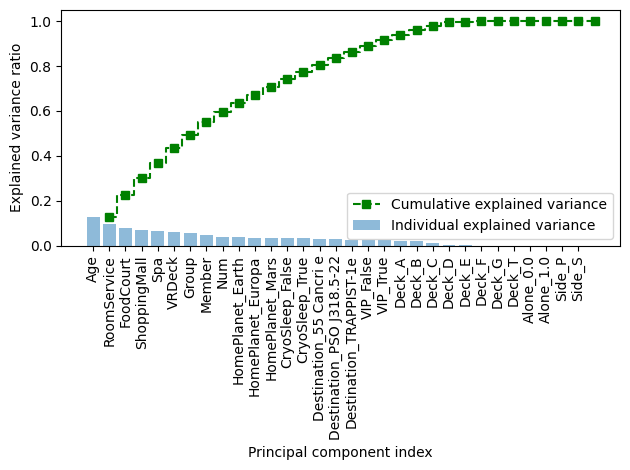

In [86]:
#impirt preprocessor.fit_transform
from sklearn import preprocessing
preprocessor = preprocessing.StandardScaler()
cov_mat = np.cov(preprocessor.fit_transform(data_encoded,label).T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)

var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(data_encoded.keys(), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
#rotate the xticks
plt.xticks(rotation=90)
plt.step(range(1, len(var_exp)+1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance'
                     , color = 'green', linestyle = '--', marker = 's')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show();

In [87]:
# try to clusterize data using the density based clustering algorithm DBSCAN the pca data
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=4.5, min_samples=10).fit(x_pc)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pc, labels))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z="x3", color=labels, size=0.1*np.ones(len(data_encoded)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()


[ 0  1 -1 ...  1  1  1]
Number of clusters: 10
Estimated number of clusters: 10
Silhouette Coefficient: 0.207


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (3).

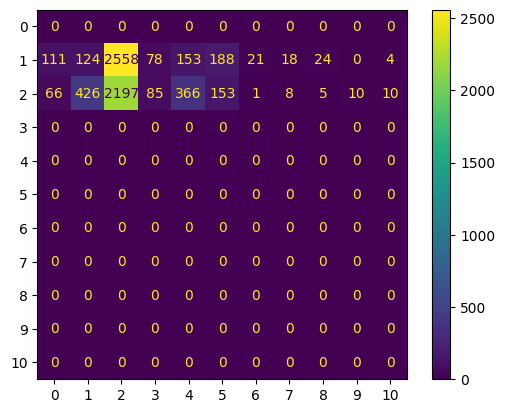

In [88]:
# complare the clusterization with the real data with a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(label, labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])
disp.plot()
